In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_events = 100
m = 1.8
b = 1.
x = 10. * np.random.rand(n_events)
noise = np.random.normal(loc = 0., scale = 0.1*x, size=n_events)
y = m*x+b + noise

print(y)

[ 2.84664064 10.48657105 18.57938057 18.23164609 18.37988889  8.04804984
  3.45092899 16.03308302 12.16533504  7.30600559 15.57168824  9.21407947
  1.20743252 14.17339419 16.92937836  8.32204956 15.97657184  8.90206353
  7.57434695 11.32328247  8.59224215  4.5867955   8.48212132  6.06324255
  4.45741237  1.13742093 14.25573271 17.07755635  6.04580992 20.13232849
 16.28651874  5.68876819 17.96023815 17.65375672  7.21807906 11.14205766
  7.18179134  3.90753949 13.46319272  6.33268358  5.31741536 13.05400059
  5.41466398  4.44605027 14.4187009   2.12037194  5.60964109  8.09147828
  3.25083327  4.82853537  3.05711795 11.87820098  8.28253896 10.67474108
 12.3116004   7.43865092  6.65044751 17.69405245 16.59294201 10.38508202
  5.07099896 12.98427591 14.75164292  8.73275837 16.86252595  7.21858262
 17.31806361 20.2978508   3.79500008  8.31707289  4.26858227  1.37218387
  5.71179477 15.17015139  1.92155039 13.27812336  3.10174948  2.95271887
  8.34201292 10.63230253  4.50809439 16.58536637 17

[[1.73882436 1.51366311]
 [1.69270314 0.83297743]
 [1.56984613 1.27366592]
 [1.72387931 1.55175793]
 [1.77506296 1.10088902]]


Text(0, 0.5, 'signal [#photoelectrons * $10^{-3}$]')

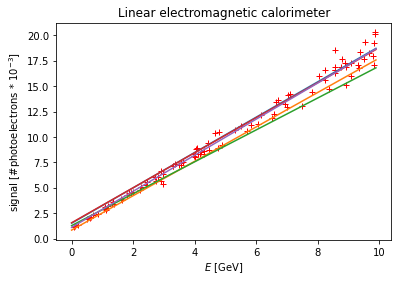

In [3]:
plt.plot(x,y,'r+')
xf = np.arange(0,10, 0.1)
np.random.seed(1)
test_param = np.random.multivariate_normal(
    np.array([m, b]), 
    cov=np.array([[0.01,0],[0,0.1]]), 
    size = 5
)
print(test_param)
for (m_try, b_try) in test_param:
    plt.plot(xf, xf*(m_try)+ b_try)

plt.title('Linear electromagnetic calorimeter')
plt.xlabel('$E$ [GeV]')
plt.ylabel('signal [#photoelectrons * $10^{-3}$]')

In [4]:
def MSE(a,b):
  return np.sqrt(np.sum((a-b)**2))

In [5]:
for m_test, b_test in test_param:
  
  y_test = m_test*x + b_test
  mse = MSE(y_test, y)
  
  print('m=', m_test, ', b=', b_test, ':')
  print('MSE=', mse, '\n')

m= 1.7388243586349925 , b= 1.5136631055910352 :
MSE= 6.678586824699772 

m= 1.692703137784383 , b= 0.8329774267085286 :
MSE= 9.597125198633323 

m= 1.5698461303119717 , b= 1.2736659213152708 :
MSE= 12.480216602852435 

m= 1.7238793099104899 , b= 1.5517579263180754 :
MSE= 6.696538273882235 

m= 1.7750629624522591 , b= 1.1008890206181676 :
MSE= 6.051979246706014 



In [6]:
y_mean = np.mean(y)
x_mean = np.mean(x)

w1 = np.sum((y-y_mean)*(x-x_mean))/np.sum((x-x_mean)**2)
w2 = y_mean - w1 * x_mean

y_opt = w1 * x + w2
print('m=', w1, ', b=', w2 ,':')
print('MSE_min = ', MSE(y_opt, y))

m= 1.7954949722263984 , b= 1.0000546232649423 :
MSE_min =  6.019716918243496


Text(0, 0.5, 'signal [#photoelectrons * $10^{-3}$]')

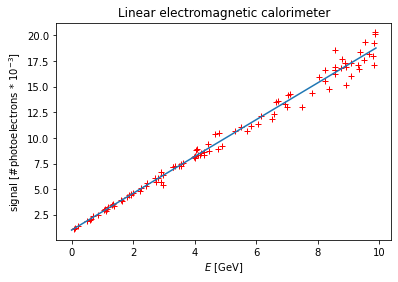

In [7]:
plt.plot(x,y,'r+')
xf = np.arange(0,10, 0.1)
plt.plot(xf, xf*w1+ w2)

plt.title('Linear electromagnetic calorimeter')
plt.xlabel('$E$ [GeV]')
plt.ylabel('signal [#photoelectrons * $10^{-3}$]')